# Scale, Standardize or Normalize with sklearn
## By Jeff Hale

I've been working on figuring out when to use sklearn's MinMaxScaler, StandardScaler, and Normalizer for preprocessing data for machine learning. As often as these topics show up in machine learning workflows, I had a tough time finding good explanations of the purposes of the different methods.

The nomenclature gets confused quite a bit. Writers often use the terms *scale* and *normalize* interchangeably. Here's my attempt to clarify. Please upvote if you find it helpful.

As part of this project I found Ben Alex Keen's helpful [post ](http://benalexkeen.com/feature-scaling-with-scikit-learn/) on the topic and used his code snippets liberally as a starting point below.

This post was originally created on [Kaggle.](https://www.kaggle.com/discdiver/scale-standardize-or-normalize-with-sklearn/edit)

## Why scale, standardize, or normalize?

Some machine learning algorithms, such as neural networks, regression-based algorithms, K-nearest neighbors algorithms, support vector machines with radial bias kernel functions, principal components analysis, and algorithms using linear discriminant analysis don't perform as well if the feature data is not on a relatively similar scale. Some times you'll find you want a more normally distributed distribution. Some of the methods below dilute the effects of outliers. 

We're gong to to stick to scaling, standardizing, and normalizing in this project. We aren't looking at transforming data with the log transformation or other transformations aimed at reducing the homoscedacity of errors that you might be shooting for in a regression model. We leave that for a future project.

## TLDR: 

* Use MinMaxScaler as the default
* Use RobustScaler if you have outliers
* Use StandardScaler if you have relatively normal distributions and just need to standardize them
* Use Normalizer sparingly, may be useful with sparse data

Here's a [cheat sheet I made in a google sheet](https://docs.google.com/spreadsheets/d/1woVi7wq13628HJ-tN6ApaRGVZ85OdmHsDBKLAf5ylaQ/edit?usp=sharing) to help folks keep the options straight. ![](https://www.dropbox.com/s/qdkzdy94fbduqnn/Scale%2C%20standardize%2C%20or%20normalize%20chart%20Jeff%20Hale.png?dl=0)

I'm looking for a good way to quickly plug a formated google sheet into a Jupyter notebook. If you know of a way, please share in the comments.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

## MinMaxScaler

Preserves the shape of the original distribution. Doesn't reduce the importance of outliers. Least disruptive to the information in the original data. The default range for the feature returned by MinMaxScaler is 0 to 1 but that can be overridden. 

Scaling a feature means to add or substract a constant and then multiply or divide by another constant. MinMaxScaler subtracts the mimimum value in the feature and then divide by the difference between the original maximum and original minimum.

It's a good place to start unless you know you want a normal distribution or have outliers you want to preserve.

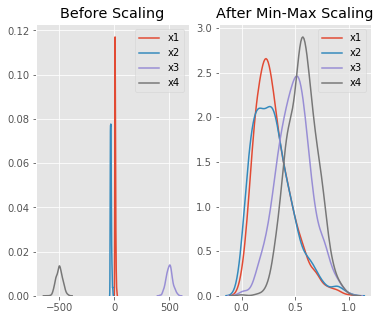

After MinMax Scaling
x1 mean = 0.29847251896850213
x1 min = 0.0
x1 max = 1.0
x3 mean = 0.49223693052839246
x3 max = 1.0
x4 mean = 0.5679396674147996


In [2]:
# based on http://benalexkeen.com/feature-scaling-with-scikit-learn/
np.random.seed(34)
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * -40,
    # no skew
    'x3': np.random.normal(50, 3, 1000) * 10,
    # negative normal
    'x4': np.random.normal(50, 3, 1000) * -10
})

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3', 'x4'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
sns.kdeplot(df['x4'], ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
sns.kdeplot(scaled_df['x4'], ax=ax2)

plt.show()
print("After MinMax Scaling")
print("x1 mean = {}".format(scaled_df.x1.mean()))
print("x1 min = {}".format(scaled_df.x1.min()))
print("x1 max = {}".format(scaled_df.x1.max()))
print("x3 mean = {}".format(scaled_df.x3.mean()))
print("x3 max = {}".format(scaled_df.x3.max()))
print("x4 mean = {}".format(scaled_df.x4.mean()))

## RobustScaler

The RobustScaler uses a similar method to the MinMaxScaler but divides by the interquartile range instead of the the difference between the original maximum and original minimum. Use this if you have outliers and want to preserve them. The returned feature's range will vary more widely than MinMax Scaler's.

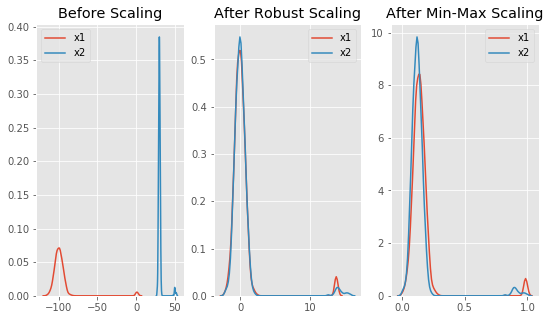

Means after robust scaling:
x1 mean: 0.2977967912397694
x2 mean: 0.33135785634950043


In [3]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000)*-5, np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)

ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()

print("Means after robust scaling:")
print("x1 mean: {}".format(robust_scaled_df.x1.mean()))
print("x2 mean: {}".format(robust_scaled_df.x2.mean()))

Let's test RobustScaler's performance with some variations in the data.

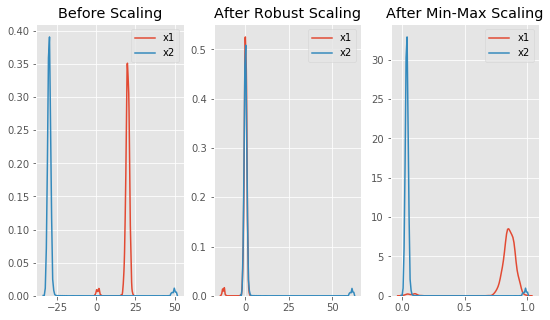

Means after robust scaling:
x1 mean: -0.2889894913153939
x2 mean: 1.4826566273290491


In [4]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(-30, 1, 1000), np.random.normal(50, 1, 25)]),
})

scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()

print("Means after robust scaling:")
print("x1 mean: {}".format(robust_scaled_df.x1.mean()))
print("x2 mean: {}".format(robust_scaled_df.x2.mean()))


Notice how RobustScaler brings the distributions together in the presence of outliers much more so than MinMaxScaler.

## StandardScaler

StandardScaler is used to standardize features by removing the mean and scaling to unit variance. Unit variance means you divide all the values by the standard deviation results in a distribution with a standard deviation equal to 1 (variance equal to 1 squared = 1). You'll want your data to be normally distributed to use StandardScaler. After using on a feature with enough data points the mean will be zero, and about 68% of the data should be between -1 and 1. 

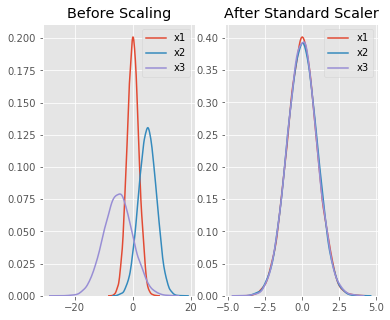

In [5]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

Look at that overlap after StandardScaler has done it's business. x1 is just a tad more leptokurtic than x2 and x3. 

## Normalizer

Normalizer works on the rows, not the columns! I went through almost this entire exercise before I caught that.

Data is often normalized by applying L2 normalization to scale the element to have a unit norm. “Unit norm” with L2 means that if each element were squared and summed, the total would equal 1. 

Jeremy's post at [http://kawahara.ca/how-to-normalize-vectors-to-unit-norm-in-python/](http://kawahara.ca/how-to-normalize-vectors-to-unit-norm-in-python/) helped me see how Normalizer works..

In most cases one of the other preprocessing tools above will be more helpful.

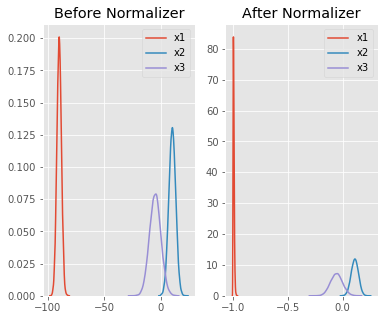

In [6]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(-90, 2, 10000),
    'x2': np.random.normal(10, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

normalizer = preprocessing.Normalizer()
normed_df = normalizer.fit_transform(df)
normed_df = pd.DataFrame(normed_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Normalizer')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)

ax2.set_title('After Normalizer')
sns.kdeplot(normed_df['x1'], ax=ax2)
sns.kdeplot(normed_df['x2'], ax=ax2)
sns.kdeplot(normed_df['x3'], ax=ax2)
plt.show()

Another example exploring what Normalizer does to data.

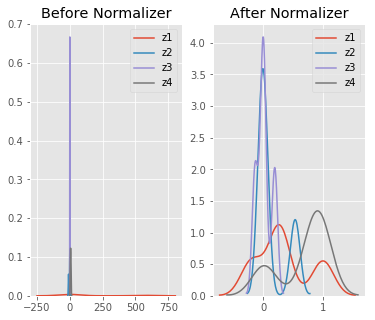

In [7]:
 df = pd.DataFrame({
    'z1': [ 1., -1.,  2., 555],
    'z2': [ 2.,  0.,  0., -10],
    'z3': [ 0.,  1., -1., 0],
    'z4': [ 3, 5, 7, 9]
})

normalizer = preprocessing.Normalizer()
normed_df = normalizer.fit_transform(df)
normed_df = pd.DataFrame(normed_df, columns=['z1', 'z2', 'z3', 'z4'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Normalizer')
sns.kdeplot(df['z1'], ax=ax1)
sns.kdeplot(df['z2'], ax=ax1)
sns.kdeplot(df['z3'], ax=ax1)
sns.kdeplot(df['z4'], ax=ax1)

ax2.set_title('After Normalizer')
sns.kdeplot(normed_df['z1'], ax=ax2)
sns.kdeplot(normed_df['z2'], ax=ax2)
sns.kdeplot(normed_df['z3'], ax=ax2)
sns.kdeplot(normed_df['z4'], ax=ax2)
plt.show()

Normalizer does bring all the features into closer scale with each other. Could be helpful for some sparse datasets. Seems like a rather blunt instrument to me. Have you found good use cases for Normalizer? If so, please share in the comments.

Special thanks again to Ben Alex Keen.